/tmp/ipykernel_3681013/1043000628.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x="Gender", y="InDegree", order=["male", "female"], showfliers=False, palette=palette_Emma)


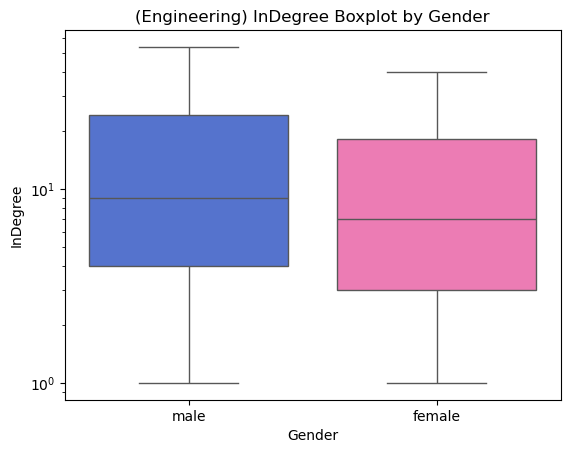

Summary Statistics of InDegree by Gender (Engineering)
            count       mean         std  min  25%  50%   75%      max
Gender                                                                
female   692960.0  14.307363   64.690821  0.0  0.0  3.0  10.0  10223.0
male    4299465.0  22.169516  101.738605  0.0  0.0  5.0  16.0  28594.0


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Engineering_degree_centrality_igraph.csv")
df_filtered = df[df["InDegree"] > 1e-6]
df_filtered = df_filtered[df_filtered["Gender"] != "unknown"]


palette_Emma = {
    "male": "royalblue",
    "female": "hotpink"
}


sns.boxplot(data=df_filtered, x="Gender", y="InDegree", order=["male", "female"], showfliers=False, palette=palette_Emma)
plt.yscale('log')
plt.title("(Engineering) InDegree Boxplot by Gender")
plt.show()

#print(df.groupby("Gender")["InDegree"].describe())

print("Summary Statistics of InDegree by Gender (Engineering)")
print(
    df[df["Gender"].isin(["male", "female"])]
    .groupby("Gender")["InDegree"]
    .describe()
)

In [3]:
from scipy.stats import mannwhitneyu

male = df[df["Gender"] == "male"]["InDegree"]
female = df[df["Gender"] == "female"]["InDegree"]

stat, p = mannwhitneyu(male, female, alternative="two-sided")
print(f"Mann-Whitney U test: U={stat}, p={p}")

Mann-Whitney U test: U=1715898460334.0, p=0.0


In [5]:
top_10_percent = df[df["InDegree"] > df["InDegree"].quantile(0.9)]
top_gender_dist = top_10_percent["Gender"].value_counts(normalize=True)
print(top_10_percent)
print(top_gender_dist)

           AuthorId  InDegree  OutDegree   Gender  log_InDegree
1        2023280306  2.305351         57     male      2.307496
3        2942456473  1.845098         58  unknown      1.851258
7        2597977724  1.973128         17   female      1.977724
8        2670296893  1.949390        161     male      1.954243
9        2109043807  1.991226         59     male      1.995635
...             ...       ...        ...      ...           ...
6242104  2150497552  1.662758          5     male      1.672098
6249927  2294457405  1.633468          0  unknown      1.643453
6254221  2753383607  1.612784          0     male      1.623249
6307641  2986220172  1.612784          0     male      1.623249
6348469  2486367690  1.623249          0  unknown      1.633468

[776101 rows x 5 columns]
Gender
male       0.611736
unknown    0.325146
female     0.063118
Name: proportion, dtype: float64


In [6]:
overall_dist = df["Gender"].value_counts(normalize=True)
print(overall_dist)


Gender
male       0.542751
unknown    0.369772
female     0.087477
Name: proportion, dtype: float64


In [8]:
import numpy as np


def gini(array):
    array = array[np.isfinite(array)]
    array = np.sort(array)
    n = len(array)
    if n == 0 or np.sum(array) == 0:
        return np.nan  
    gini_index = (2 * np.sum((np.arange(1, n + 1) * array))) / (n * np.sum(array)) - (n + 1) / n
    return gini_index

import pandas as pd
for gender in df["Gender"].unique():
    group = df[df["Gender"] == gender]
    gini_score = gini(group["InDegree"].values)
    print(f"Gini coefficient for {gender} (In-Degree): {gini_score:.4f}")
    
overall_gini = gini(df["InDegree"].values)
print(f"Overall Gini coefficient (In-Degree): {overall_gini:.4f}")

Gini coefficient for male (In-Degree): 0.3341
Gini coefficient for unknown (In-Degree): 0.3413
Gini coefficient for female (In-Degree): 0.3486
Overall Gini coefficient (In-Degree): 0.3385
